In [1]:
import pandas as pd   #this cell imports the applications to perform the analysis
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

In [2]:
import glob
import os
from shutil import copyfile

In [3]:
df = pd.concat([pd.read_csv(f, sep='\\s+', header=1) for f in glob.glob('*/score.sc')], ignore_index = True)
#this data frame imports all of the score files from all of the folders and displays them on a table format

In [4]:
print(df) #this is what the table looks like, containing all of the scores and metrics from all the structures

      SCORE:  total_score  DEE_total_energy  DEH_total_energy  \
0     SCORE:     -915.511           -27.935            -3.241   
1     SCORE:     -916.322           -28.012            -3.105   
2     SCORE:     -919.926           -30.615            -3.464   
3     SCORE:     -912.550           -28.964            -3.872   
4     SCORE:     -907.382           -29.441            -2.819   
...      ...          ...               ...               ...   
8107  SCORE:     -909.145           -20.911            -2.912   
8108  SCORE:     -910.545           -21.524            -3.491   
8109  SCORE:     -910.169           -18.919            -2.552   
8110  SCORE:     -904.922           -18.958            -2.556   
8111  SCORE:     -921.685           -18.872            -2.374   

      angle_constraint  atom_pair_constraint  dihedral_constraint  dslf_fa13  \
0                  0.0                 0.001                0.526        0.0   
1                  0.0                 0.001               

19.837336415187377


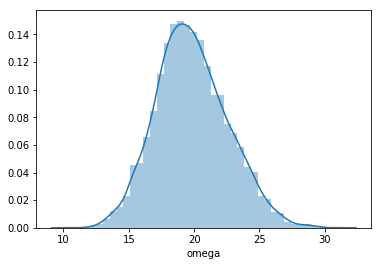

In [5]:
sns.distplot(df["omega"], bins=40)   #this cell looks at the omega scores, and then plots a bar graph with all of
print(df['omega'].mean())  #the results, also calculates the mean

2.618602687376726


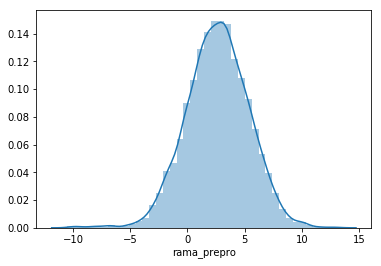

In [6]:
sns.distplot(df["rama_prepro"], bins=40) #this cell collects all the rama_prepro metrics and plots them in a bar graph
print(df['rama_prepro'].mean())  #also calculates the mean of the metrics

-132.54723989151873


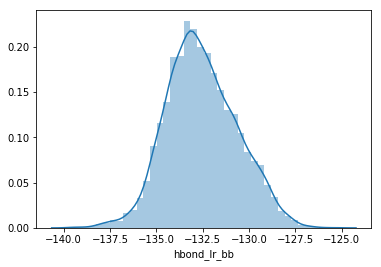

In [7]:
sns.distplot(df["hbond_lr_bb"], bins=40)  #this collects the long-distance hbond metrics and plots them on a bar graph
print(df['hbond_lr_bb'].mean())  #it also calculates the mean

In [10]:
dpicked = df.loc[(df['hbond_lr_bb'] < -125.0) & (df['omega'] < 20.5)]   #using the previous metrics and means, we can select for those designs which fit the desired parameters
dpicked.shape  #in this case, we only select those with a certain omega and hbond_ls_bb scores
#the output will tell you the number of designs which have passed this 'filter'

(5033, 31)

In [11]:
for model in dpicked.description:  #once the designs are selected, they are moved into the network analysis folder
    folder_id = '_'.join(model.split('_')[:-1])
    parent = folder_id + "/" + folder_id + ".pdb"
    source = str(folder_id) + "/" + model + ".pdb"
    target_model = "../networks_analysis_B/" + model + ".pdb"
    target_parent = "../networks_analysis_B/" + folder_id + ".pdb"
    copyfile(source, target_model)
    copyfile(parent, target_parent)